## Plot Metrics ##

This script plots MSE metrics collected from all benchmarks to be used in the final report.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df_metrics = pd.read_csv("../docs/mse-summary.csv")

df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Architecture  4 non-null      object 
 1   NYU v2        4 non-null      float64
 2   DIML Indoor   4 non-null      float64
 3   DIML Outdoor  4 non-null      float64
 4   Middleburry   4 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


<ipython-input-80-fd1dc6b2964a>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-80-fd1dc6b2964a>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()


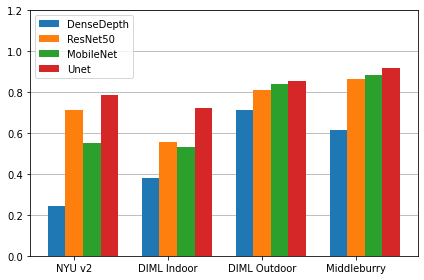

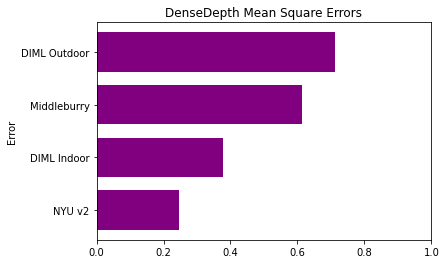

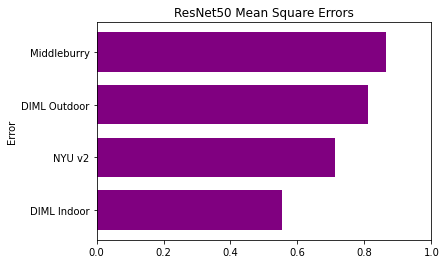

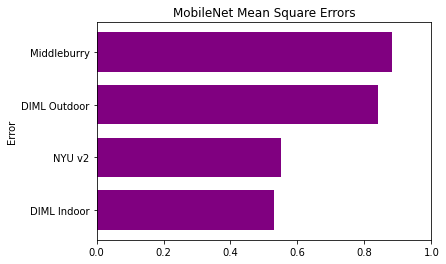

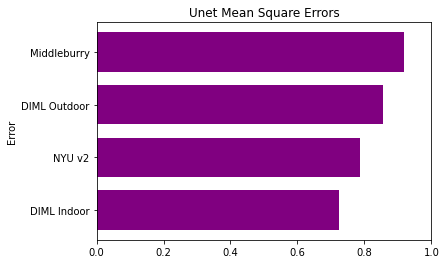

In [80]:
# Generate one bar plot for each network architecture
fig0, ax0 = plt.subplots()

for i, row in df_metrics.iterrows():

    arch = row["Architecture"]
    errors = row[1:]

    # Grouped bar chart
    ax0.bar(x=[x - 0.75 / 2 + 0.75 * (i + 1) / 4 for x in range(len(errors))],
            width=0.75 / 4, height=errors.values, label=arch)

    errors.sort_values(inplace=True)

    # Individual network errors
    fig1, ax1 = plt.subplots()

    ax1.set_xlim([0, 1])
    ax1.set_ylabel("Error")
    ax1.set_title(arch + " Mean Square Errors")
    ax1.barh(y=range(len(errors)), width=errors.values,
             height=0.75, tick_label=errors.keys(), color="purple")

    fig1.savefig("../docs/bar-mse-" + arch.lower() + ".png")
    fig1.show()

ax0.set_ylim([0, 1.2])
ax0.set_xticks(range(df_metrics.shape[1] - 1))
ax0.set_xticklabels(df_metrics.columns[1:])
ax0.set_axisbelow(True)
ax0.legend()
ax0.yaxis.grid()

fig0.tight_layout()
fig0.savefig("../docs/bar-mse.png")
fig0.show()